In [3]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import crops_dict

%matplotlib inline

font = {'family' : 'serif',
        'size'   : 2
       }

matplotlib.rc('font', **font)

csv name is: 43_11740_lat_41.97774_lon_-100.569_2020-03-10_173858_modified.csv
SiteNo is: 43
csv name is: 404618098504401_11741_lat_40.77168_lon_-98.84591_2020-03-10_173751_modified.csv
SiteNo is: 404618098504401
csv name is: 404717099460501_11741_lat_40.78761_lon_-99.76804_2020-03-10_173753_modified.csv
SiteNo is: 404717099460501
csv name is: 405305097351503_11742_lat_40.88473_lon_-97.58783_2020-03-10_173802_modified.csv
SiteNo is: 405305097351503
csv name is: 420425097101301_11922_lat_42.07361_lon_-97.17028_2020-03-10_173849_modified.csv
SiteNo is: 420425097101301
csv name is: 405445100074001_11740_lat_40.91222_lon_-100.1284_2020-03-10_173807_modified.csv
SiteNo is: 405445100074001
csv name is: 405855100073901_11740_lat_40.98186_lon_-100.1274_2020-03-10_173815_modified.csv
SiteNo is: 405855100073901
csv name is: 404233100132301_11740_lat_40.70917_lon_-100.2235_2020-03-10_173748_modified.csv
SiteNo is: 404233100132301
csv name is: 24_11739_lat_41.205661_lon_-103.931283_2020-03-10_1737

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

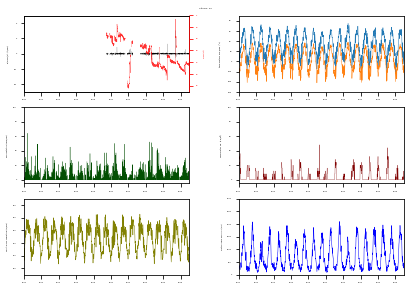

In [4]:
WELL_DATA_PATH_MODIFIED = os.getcwd() + '/../data/well-time-series-HPA-modified-no-crop/'
path = WELL_DATA_PATH_MODIFIED
SAVE_DIR = os.getcwd() + '/figs_temp-no-crop/'

if not os.path.exists(SAVE_DIR):
    os.mkdir(SAVE_DIR)

#crops = crops_dict.crops

unwanted_params = [#'Date_Month',
                   'year',
                   #'X_72019_00001',
                   'site_no',
                   #'US_State',
                   #'dDTW_dt'
                    ]

for csv_well_data in os.listdir(WELL_DATA_PATH_MODIFIED)[::-1]:
    if os.path.splitext(csv_well_data)[-1].lower() != '.csv':
        continue

    csv_name = os.path.basename(csv_well_data)
    site_number = csv_name.split("_")[0]
    print("csv name is: {}".format(csv_name) )
    print("SiteNo is: {}".format(site_number) )

    well_data = pd.read_csv(WELL_DATA_PATH_MODIFIED + csv_well_data)
    well_data = well_data.drop(unwanted_params, axis=1)

    well_data.index = pd.to_datetime(well_data['Date'])

    if len(well_data["DTW"].dropna())>200:

        fig, axs = plt.subplots(3,2)

        ## water levels
        fig_args = {'color':'k',
                    'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.1,
                    'label':'d(DTW)/dt'}

        axs[0,0].plot(well_data.index, well_data["dDTW_dt"], **fig_args)
        axs[0,0].set_ylabel('d(DTW)/dt (ft/day)')
        axs[0,0].set_ylim([-5, 5])

        axs[0,0].spines['right'].set_color('k')
        axs[0,0].tick_params(axis='y', colors='k')
        axs[0,0].yaxis.label.set_color('k')

        ax2 = axs[0,0].twinx()
        fig_args = {'color':'r',
                'marker':None,
    #            'markeredgecolor':'w',
                'markersize':0.1,
                'alpha':0.8,
                'linewidth':0.3,
                'label':'DTW'}

        ax2.plot(well_data.index, well_data["DTW"], **fig_args)

        ax2.spines['right'].set_color('r')
        ax2.tick_params(axis='y', colors='r')
        ax2.yaxis.label.set_color('r')
        ax2.set_ylabel('DTW (ft)')

        ## temperature
        fig_args = {'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.5}

        resampled_tmax = well_data["tmax (deg c)"].resample('W').mean()
        resampled_tmin = well_data["tmin (deg c)"].resample('W').mean()
#        axs[0,1].plot(well_data.index, well_data["tmax (deg c)"],
        axs[0,1].plot(resampled_tmax.index, resampled_tmax,
                      label='tmax', **fig_args)
#        axs[0,1].plot(well_data.index, well_data["tmin (deg c)"],
        axs[0,1].plot(resampled_tmin.index, resampled_tmin,
                      label='tmin', **fig_args)
#        axs[0,1].plot(well_data.index, np.zeros_like(well_data["tmax (deg c)"]), lw=0.1,
#                                                                                 color='gray')
        axs[0,1].plot(resampled_tmin.index, np.zeros_like(resampled_tmin), lw=0.1,
                                                                           color='gray')
        axs[0,1].set_ylabel("temperature min/max ($^{\circ}$C)")
        axs[0,1].set_ylim([-30, 45])
        
        ## precipitation
        fig_args = {'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.3,
                    'color':'#004d00'}

        axs[1,0].plot(well_data.index, well_data["prcp (mm/day)"],
                      label='prcp', **fig_args)
        axs[1,0].set_ylabel("precipitation (mm/day)")
        axs[1,0].set_ylim([-5, 100])
        
        ## snow water equivalent
        fig_args = {'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.3,
                    'color':'#800000'}

        axs[1,1].plot(well_data.index, well_data["swe (kg/m^2)"],
                      label='snow-water eq.', **fig_args)
        axs[1,1].set_ylabel("snow-water eq. (kg/m$^2$)")
        axs[1,1].set_ylim([-5, 100])
        
        ## radiation
        fig_args = {'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.5,
                    'color':'#808000'}

#        axs[2,0].plot(well_data.index, well_data["srad (W/m^2)"],
        resampled_radiation = well_data["srad (W/m^2)"].resample('W').mean()
        axs[2,0].plot(resampled_radiation.index, resampled_radiation,
                      label='radiation', **fig_args)
        axs[2,0].set_ylabel("short-wave radiation (W/m2)")
        axs[2,0].set_ylim([50, 650])

        ## water vapor pressure
        fig_args = {'markersize':0.1,
                    'alpha':0.99,
                    'linewidth':0.5,
                    'color':'blue'}
        
        resampled_vap = well_data["vp (Pa)"].resample('W').mean()
#        axs[2,1].plot(well_data.index, well_data["vp (Pa)"],
        axs[2,1].plot(resampled_vap.index, resampled_vap,
                      label='vapor pressure', **fig_args)
        axs[2,1].set_ylabel("water vapor pressure (Pa)")
        axs[2,1].set_ylim([-5, 3000])

        plt.suptitle("SiteNo: {}".format(site_number))

        left   = 0.08  # the left side of the subplots of the figure
        right  = 0.96  # the right side of the subplots of the figure
        bottom = 0.05  # the bottom of the subplots of the figure
        top    = 0.95  # the top of the subplots of the figure
        wspace = 0.30  # the amount of width reserved for space between subplots,
                       # expressed as a fraction of the average axis width
        hspace = 0.2   # the amount of height reserved for space between subplots,
                       # expressed as a fraction of the average axis height

        plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

        # Setting the values for all axes.
        plt.setp(axs, xlim=[pd.Timestamp('2000-01-01'), pd.Timestamp('2018-12-30')])

        plt.savefig(SAVE_DIR + csv_name[:-4] + ".png", dpi=300)
        plt.clf()